<a href="https://colab.research.google.com/github/lareynolds/QB-EDA/blob/main/qb_bivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring the Bivariate Landscape: Navigating Relationships in EDA

If you are still with me following along, we are now entering the phase of analysis where the rubber begins to meet the road to eventually get to the answer to the [original research question](https://myordinaryjourney.com/the-first-detour/): Is there a connection between a quarterback's race and the number of times they get a Roughing the Passer (RtP) call in their favor. So far, we have completed the following steps in our EDA journey:

*   [Data Collection](https://myordinaryjourney.com/the-first-detour/)
*   [Data Cleaning](https://myordinaryjourney.com/first-the-idea-then-the-data/)
*   [Data Exploration](https://myordinaryjourney.com/cruising-the-data-landscape-exploring-the-fundamentals-of-data-exploration/)
*   [Univariate Analysis](https://myordinaryjourney.com/voyage-through-univariate-analysis-charting-the-solo-attributes-of-roughing-the-passer-penalties-in-the-nfl/)

Now, we are diving into Bivariate Analysis. In this step, we will examine relationships between pairs of variables. Utilizing scatter plots, correlation matrices, and other tools, we will investigate how variables interact with each other, aiming to identify correlations, dependencies, or trends of interest.

For this phase, I will once again employ R to gain additional practice. The initial step involves importing the necessary libraries for this part of the analysis, as well as the QBs dataset we've been working with.

In [ ]:
install.packages("ggcorrplot")
library(ggcorrplot)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Loading required package: ggplot2



In [ ]:
url <- "https://raw.githubusercontent.com/lareynolds/QB-EDA/main/cleaned_qbs.csv"

In [ ]:
qbs = read.csv(file = url)

 Now it may seem pretty easy and straight forward to follow the steps and just do what I just did. But what you don't see is the extra tabs I have open to help through the process. For example, At first I tried to import the dataset as an Excel file, but that made the system throw some errors. So then, I thought it would be easier to import the file as a .csv file, and it sort of was, but I still got a bunch of errors. Apparently Google Colab doesn't like to import files straight from GitHub as is, so off to with [Stack Overflow](https://stackoverflow.com/) or [Toward Data Science](https://towardsdatascience.com/) I go. In case you haven't read anything on TDS, you should. This is a gem of quick tips and tricks for everything in data science.

 Thanks to A Apte's TDS article ["Get Started: 3 Ways to Load CSV files into Colab"](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92), the answer is:
 "Click on the dataset in your repository, then click on View Raw. Copy the link to the raw dataset and store it as a string variable called url in Colab."

In [ ]:
# Double Checking to make sure the data is loaded into the notebook
str(qbs)

'data.frame':	66 obs. of  26 variables:
 $ Player      : chr  "A.Dalton" "A.Luck" "A.Rodgers" "A.Smith" ...
 $ Total       : int  25 17 41 23 12 9 6 18 2 30 ...
 $ X2009       : int  0 0 3 1 0 0 1 0 0 3 ...
 $ X2010       : int  0 0 3 1 0 0 1 0 0 0 ...
 $ X2011       : int  4 0 3 1 0 2 0 0 0 3 ...
 $ X2012       : int  1 5 5 1 0 1 0 0 0 1 ...
 $ X2013       : int  1 3 2 1 0 0 0 0 0 1 ...
 $ X2014       : int  5 4 2 6 1 0 1 0 0 4 ...
 $ X2015       : int  0 1 5 4 2 2 1 0 1 2 ...
 $ X2016       : int  1 1 4 1 1 1 0 0 0 1 ...
 $ X2017       : int  1 0 0 5 7 1 1 0 0 3 ...
 $ X2018       : int  1 3 1 2 1 0 0 3 1 4 ...
 $ X2019       : int  6 0 3 0 0 0 1 4 0 0 ...
 $ X2020       : int  0 0 2 0 0 1 0 4 0 2 ...
 $ X2021       : int  3 0 5 0 0 1 0 5 0 6 ...
 $ X2022       : int  2 0 3 0 0 0 0 2 0 0 ...
 $ X2023       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Games       : int  170 94 228 149 79 62 60 74 44 190 ...
 $ Per.Game    : num  0.15 0.18 0.18 0.15 0.15 0.15 0.1 0.24 0.05 0.16 ...
 $ Attempts   

In [ ]:
# Checking the summary statistics of each of the variables in the dataset
summary(qbs)

    Player              Total           X2009           X2010       
 Length:66          Min.   : 2.00   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.: 8.25   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :15.50   Median :0.000   Median :0.0000  
                    Mean   :18.09   Mean   :0.697   Mean   :0.8333  
                    3rd Qu.:24.75   3rd Qu.:1.000   3rd Qu.:1.0000  
                    Max.   :57.00   Max.   :5.000   Max.   :6.0000  
     X2011           X2012           X2013           X2014      
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :0.000   Median :0.000   Median :0.000   Median :0.500  
 Mean   :1.121   Mean   :1.258   Mean   :1.076   Mean   :1.333  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:1.000   3rd Qu.:2.000  
 Max.   :8.000   Max.   :6.000   Max.   :8.000   Max.   :7.000  
     X2015           X2016           X2017           X2018    

In [ ]:
# Creates a subset dataframe with the numeric variables
df = subset(qbs, select = c(Per.Game, Per.100.Att, Per.Sack, Sack.Per.Att, qboc)) # To drop columns use a '-' before the c and list the columns to drop

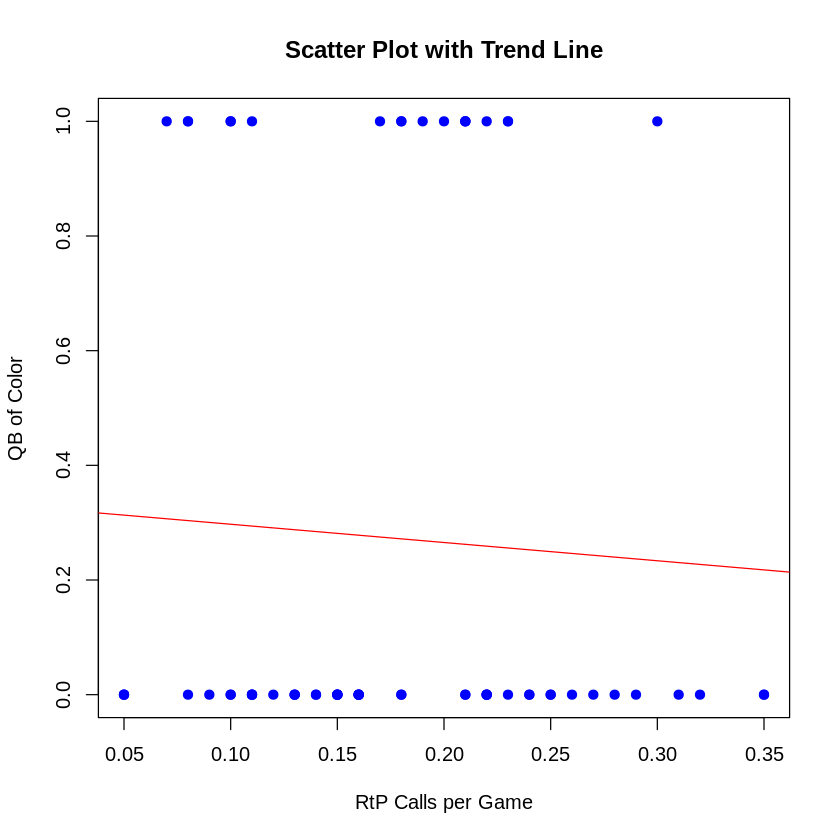

In [ ]:
# Create the scatter plot
x <- qbs$Per.Game # x is the column with the RtP values per game for each quarterback
y <- qbs$qboc # y is either the 1 or 0 value to indicate if the quarterback is black or not

plot(x, y, main = "Scatter Plot with Trend Line", xlab = "RtP Calls per Game", ylab = "QB of Color", col = "blue", pch = 19)

# Add the trend line
abline(lm(y ~ x), col = "red") # the 'lm' in this line is calling a liner model to fit a line that best fits the data by reducing the error

Notice that the qboc is either a 1 or a 0. This is a binary variable. This might cause some implications later on. But for right now, it does appear that there is a negative association between the quaterbacks' race and the number of RtP calls made in the quarterback's favor. This means that the number of RtP calls decrease for quarterbacks of color.

In the [Univariate Analysis](https://myordinaryjourney.com/voyage-through-univariate-analysis-charting-the-solo-attributes-of-roughing-the-passer-penalties-in-the-nfl/) post, I decided that I would examine the Per.Game and qboc variables in this analysis, but after thinking about it, I decided it might be worth taking a look to see if maybe there was another reason for the number of RtP calls. Could a quarterback that gets sacked a lot also draw more RtP calls? Could this be an indication that the offensive line is not as good and can't protect the quarterback as well? So I'm also going to do a scatter plot for the percentage of sacks by the number of RtP calls per game.

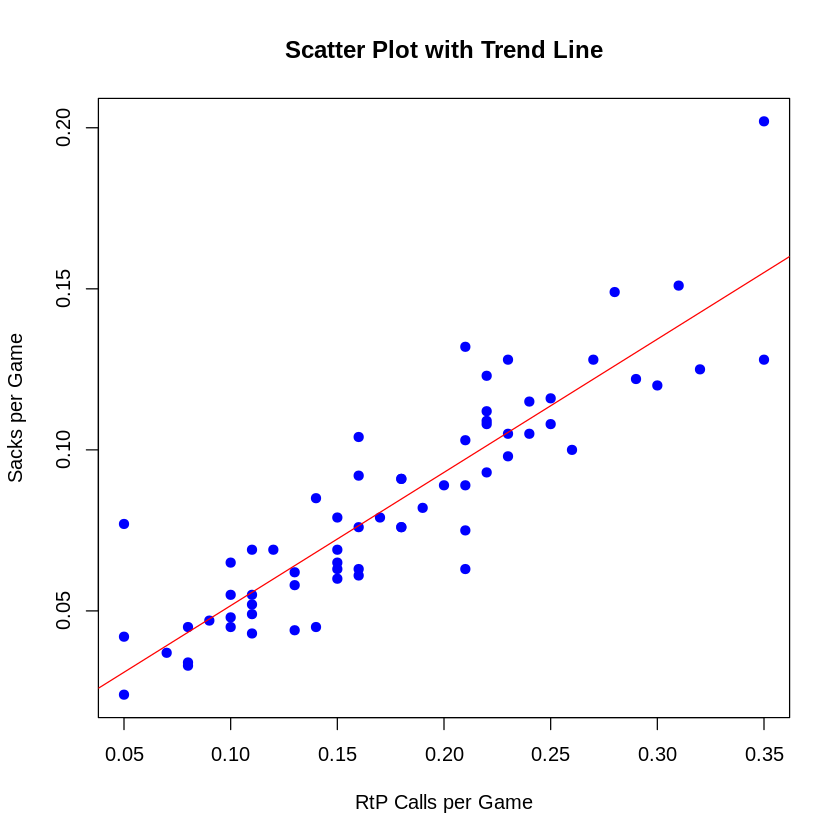

In [ ]:
# Create the scatter plot
x <- qbs$Per.Game
y <- qbs$Per.Sack
plot(x, y, main = "Scatter Plot with Trend Line", xlab = "RtP Calls per Game", ylab = "Sacks per Game", col = "blue", pch = 19)

# Add the trend line
abline(lm(y ~ x), col = "red")
# This is the same code as above, but I switched out the variable for y.

There does indeed seem to be a strong positive linear connection between the number of sacks and the number of RtP calls. One other thing to notice is that there may be some outliers for these variables. I would like to see if this is true so I am going to use the Interquartile Range (IQR) Method to determine if this is the case. This method involves calculating the IQR for your data and identify data points outside the "whiskers" of the boxplot (usually 1.5 times the IQR).

In [ ]:
# Calculate the IQR for 'y' variable
q <- quantile(y, c(0.25, 0.75))
iqr <- q[2] - q[1]

# Set a threshold for outliers
threshold <- 1.5

# Identify outliers
outliers <- y < (q[1] - threshold * iqr) | y > (q[2] + threshold * iqr)

# Print the indices of outlier data points
which(outliers)

[1] 56

In [ ]:
value = qbs[56, 1]

value

[1] "R.Fitzpatrick"

Well that is interesting, apparently Ryan Fitzpatrick took enough sacks to litterly send his stats off the charts. In this case identifying the outlier was a "good to know" exercise. However, in other datasets outliers may indicate errors in the data and should be examined farther. Now let's get back to our task at hand.

Let's see if there is a correlation between our numeric variables. It does look like there is some level of negative correlation between the number of RtP calls and the quarterback’s race. And the scatter plot of the Sacks and RtP calls seem to be very correlated. We can created a correlation matrix to visualize the correlation coefficient between each of the variables.

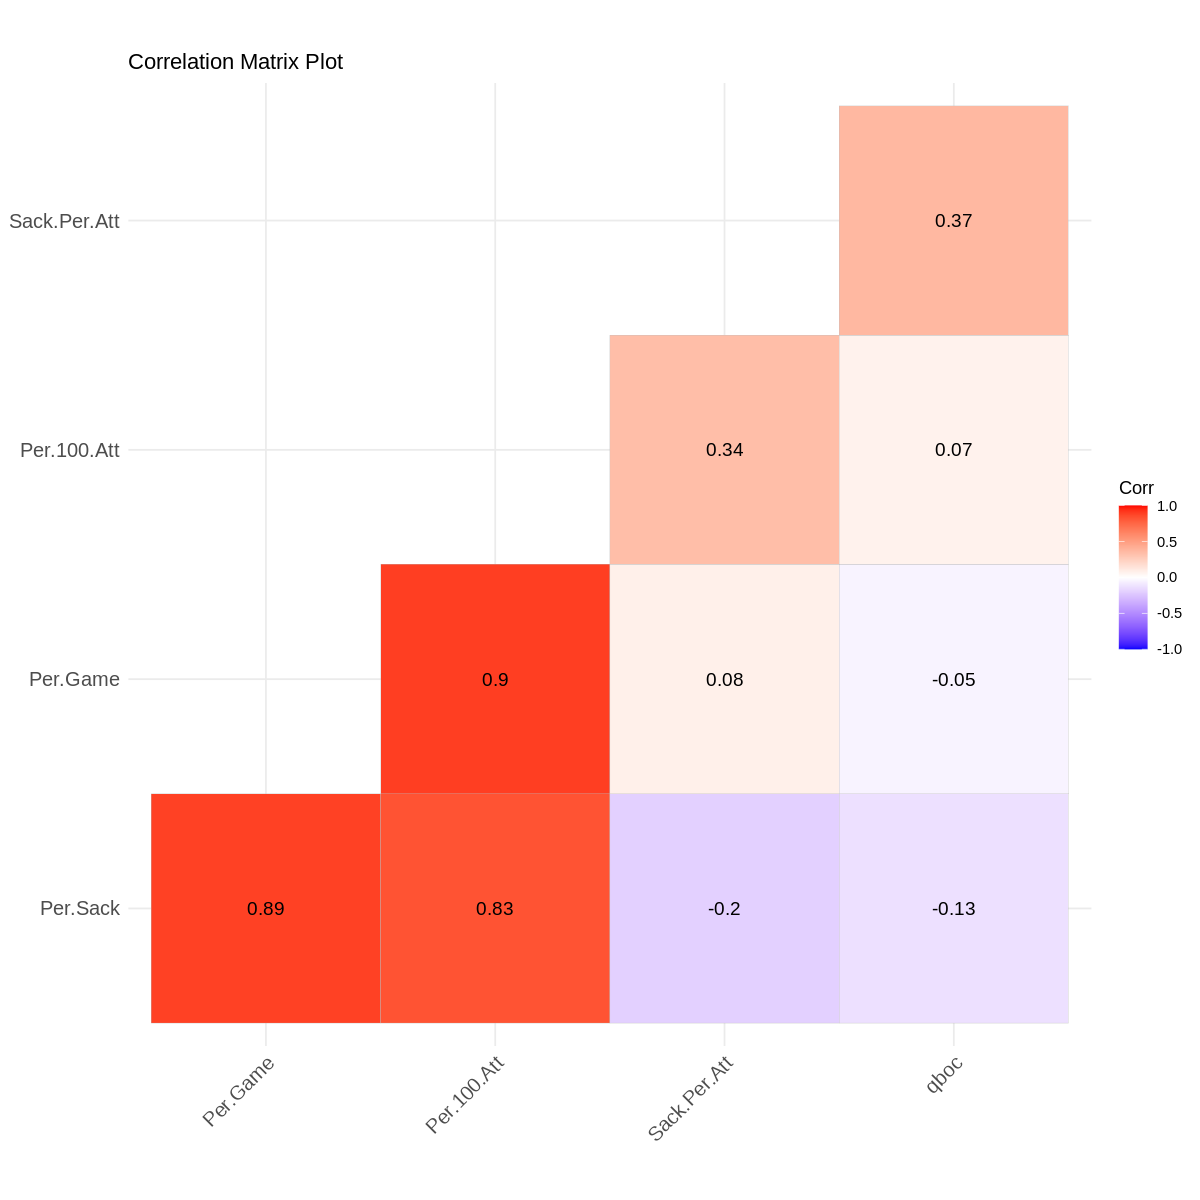

In [ ]:
corr_matrix <- cor(df)
corr_plot<- ggcorrplot(corr_matrix,
           type = "lower",  # "lower" displays the lower triangular part of the matrix
           hc.order = TRUE, # reorder variables based on hierarchical clustering
           lab = TRUE,      # display variable names
           title = "Correlation Matrix Plot",
           ggtheme = theme_minimal()) # choose a theme for the plot (optional)


# Change the size of the display window
options(repr.plot.width = 10, repr.plot.height = 10)

# Display the correlation matrix plot
print(corr_plot)

In [ ]:
RtP_correlation <- cor(qbs$Per.Game, qbs$qboc)
RtP_correlation

[1] -0.05236281

In [ ]:
RtP_Sack_correlation <- cor(qbs$Per.Game, qbs$Per.Sack)
RtP_Sack_correlation

[1] 0.8924001

We can draw some conclutions from the correlation matrix, such as it appears as though quarterbacks of color get sacked more, but benefit less from RtP call than their white counterparts. But don't forget, the qboc variable is binary, so we need to make sure that we aren't drawing some erronious conclusions by using statistal methods meant to be used on continuos data.

For this reason, I am also going to also look at the point-biserial correlation coefficient. This is a correlation coefficient used to measure the [strength and direction of the linear relationship between a binary (dichotomous) variable (0 or 1) and a continuous variable.](https://resources.nu.edu/statsresources/Pointbiserial#:~:text=The%20Point%2DBiserial%20Correlation%20is,no%2C%20true%2Ffalse). It is an adapted form of the Pearson correlation coefficient, which is used for two continuous variables. The point-biserial correlation is appropriate when one of the variables is binary, and the other is continuous.

Here are the key points about the point-biserial correlation coefficient:

**Purpose**: The point-biserial correlation is used to determine if there is a significant linear relationship between a binary predictor variable (e.g., yes/no, pass/fail) and a continuous outcome variable (e.g., test scores, income).

**Range**: The point-biserial correlation coefficient ranges from -1 to 1, similar to the Pearson correlation coefficient. A positive value indicates a positive relationship (as the binary variable increases, the continuous variable tends to increase), while a negative value indicates a negative relationship (as the binary variable increases, the continuous variable tends to decrease).

**Interpretation**:
   - A coefficient close to 1 or -1 suggests a strong linear relationship.
   - A coefficient close to 0 suggests a weak or no linear relationship.
   - The sign (+ or -) indicates the direction of the relationship.

**Assumptions**: Like the Pearson correlation, the point-biserial correlation assumes linearity and normality. It is also sensitive to outliers.

**Use Cases**:
   - In research, it is used to examine associations between a binary predictor variable (e.g., gender, treatment group) and a continuous outcome variable (e.g., test scores, response time).
   - Commonly used in educational research (e.g., comparing the performance of two groups).
   - Often used in psychology to assess the relationship between a binary variable (e.g., presence/absence of a condition) and a continuous measure (e.g., anxiety levels).

In [ ]:
# Sample data: binary variable (0s and 1s) and continuous variable
binary_variable <- qbs$qboc
continuous_variable <- qbs$Per.Game

# Calculate the mean and standard deviation for both groups
mean_0 <- mean(continuous_variable[binary_variable == 0])
mean_1 <- mean(continuous_variable[binary_variable == 1])

sd_0 <- sd(continuous_variable[binary_variable == 0])
sd_1 <- sd(continuous_variable[binary_variable == 1])

# Calculate the difference in means
mean_diff <- mean_1 - mean_0

# Calculate the proportion of 1s in the binary variable
p <- mean(binary_variable)

# Calculate the pooled standard deviation
pooled_sd <- sqrt(((sd_0^2 + sd_1^2) / 2))

# Calculate the biserial correlation
biserial_correlation <- mean_diff / (pooled_sd * sqrt(p * (1 - p)))

# Print the result
print(biserial_correlation)


[1] -0.2702969


The biserial_correlation does indicate that there is an association between the number of RtP called in favor of the quarterback is inversely related to their race. However, the strength of the correlation may be a little week given how far -0.27 is from -1. Biserial correlations are sensitive to outliers, so let's see what happens if we remove Ryan Fitzpatrick from the dataset... just for giggles... and re-run the correlation before moving on to testing to see if the correlation is statistically significant.

In [ ]:
row_index_to_remove <- 56
new_qbs <- qbs[-row_index_to_remove, ]

In [ ]:
# Sample data: binary variable (0s and 1s) and continuous variable
binary_variable <- new_qbs$qboc
continuous_variable <- new_qbs$Per.Game

# Calculate the mean and standard deviation for both groups
mean_0 <- mean(continuous_variable[binary_variable == 0])
mean_1 <- mean(continuous_variable[binary_variable == 1])

sd_0 <- sd(continuous_variable[binary_variable == 0])
sd_1 <- sd(continuous_variable[binary_variable == 1])

# Calculate the difference in means
mean_diff <- mean_1 - mean_0

# Calculate the proportion of 1s in the binary variable
p <- mean(binary_variable)

# Calculate the pooled standard deviation
pooled_sd <- sqrt(((sd_0^2 + sd_1^2) / 2))

# Calculate the biserial correlation
biserial_correlation <- mean_diff / (pooled_sd * sqrt(p * (1 - p)))

# Print the result
print(biserial_correlation)

[1] -0.1595576


So that is interesting that the strength of the correlation decreased by removing the outlier. Since I want as much data as possible, and there was no error in the data for the outlier, I am going to use the entire dataset when testing to see if the correlation is statistically significant.

The next step in this process is hypothesis testing. In this study:

*   Ho = There is no correlation between a quarterback's race and the number of RtP calls made in his favor
*   Ha = There is a correlation between race and RtP calls

The alpha for this test will be 0.05.

In [ ]:
categorical_variable <- qbs$qboc
continuous_variable <- qbs$Per.Game

# Compute the Point-Biserial Correlation and perform the test
correlation_test <- cor.test(categorical_variable, continuous_variable)

# Check the p-value
p_value <- correlation_test$p.value

# Set your significance level (e.g., 0.05)
alpha <- 0.05

# Determine if the correlation is statistically significant
if (p_value < alpha) {
  cat("The correlation is statistically significant (p-value:", p_value, ")\n")
} else {
  cat("The correlation is not statistically significant (p-value:", p_value, ")\n")
}

The correlation is not statistically significant (p-value: 0.6762716 )


There you have it, folks. According to the findings of our analysis, the NFL is doing a good job of minimizing bias in penalty calls.

### Summary

In this phase of the EDA, I examined the relationship between a quarterback's race and the number of RtP calls made in favor of the QB. I utilized scatter plots with trend lines to visualize potential relationships, employed a correlation matrix to identify the strength and direction of these relationships, checked for outliers to assess their impact on the relationship's strength, ensured the use of the appropriate correlation technique to account for a categorical independent variable, and conducted hypothesis testing to determine the statistical significance of the correlation.